In [49]:
"""
Problem Statement : Predict house price
Target is predicting price and since it is continuos 
So, we will apply Regression Models.

Data Description:
Total 5000 rows ,total 7 columns:
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 

Data Preprocessing
Null values- None
Outlier removal - "Avg. Area Income"
Skewness check - Most of the features are normally distributed. 
                 Checked For "Avg. Area Income",Avg. Area Number of Bedrooms
Object Datatype Encoding - Address - according to domain knowledge -- dropped it
Data Scaling
Applied Model -- Linear Regression
Model perfomance :MSE : 13180616893.166945, R2=0.90
3 the assumptions of Linear Regression satisfied
Multicollinearity present
"""

'\nProblem Statement : Predict house price\nTarget is predicting price and since it is continuos \nSo, we will apply Regression Models.\n\nData Description:\nTotal 5000 rows ,total 7 columns:\n #   Column                        Non-Null Count  Dtype  \n---  ------                        --------------  -----  \n 0   Avg. Area Income              5000 non-null   float64\n 1   Avg. Area House Age           5000 non-null   float64\n 2   Avg. Area Number of Rooms     5000 non-null   float64\n 3   Avg. Area Number of Bedrooms  5000 non-null   float64\n 4   Area Population               5000 non-null   float64\n 5   Price                         5000 non-null   float64\n 6   Address                       5000 non-null   object \n\nData Preprocessing\nNull values- None\nOutlier removal - "Avg. Area Income"\nSkewness check - Most of the features are normally distributed. \n                 Checked For "Avg. Area Income",Avg. Area Number of Bedrooms\nObject Datatype Encoding - Address - accordi

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [51]:
df=pd.read_csv("Real_estates.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [52]:
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [53]:
# Null value check - No null value
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [54]:
df.describe() # almost normally distributed data
# little negative skewness in Avg Area Income,Avg. Area Number of Bedrooms

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: ylabel='Avg. Area Number of Bedrooms'>

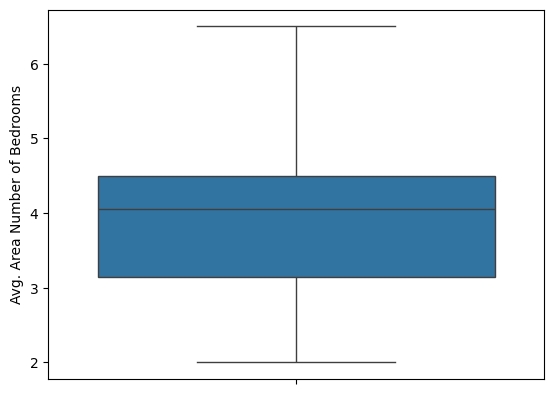

In [55]:
# outlier check
sns.boxplot(df["Avg. Area Number of Bedrooms"])

<Axes: ylabel='Avg. Area Income'>

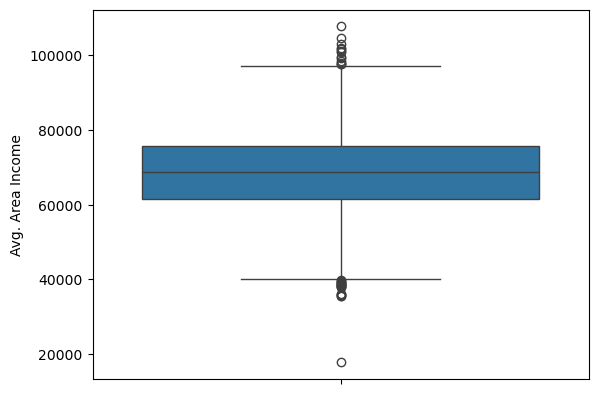

In [56]:
sns.boxplot(df["Avg. Area Income"])

In [83]:
def replace_outiers_with_median_individual_numerical_col(df):
    numerical_cols=["Avg. Area Income"]
    for column in numerical_cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        print("Lower whisker : ",lw)
        print("Upper whisker : ",uw)
        median_value = df[column].median()
        # replace outlliers with median value
        # eg df.loc[(df['symboling']<0)|(df["symboling"]>2),"symboling"]
        df.loc[(df[column]<lw )| (df[column]>uw),column]=median_value
    return df
        
df=replace_outiers_with_median_individual_numerical_col(df)      
df.head()  

Lower whisker :  40460.826853417486
Upper whisker :  96829.09851173924


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<Axes: ylabel='Avg. Area Income'>

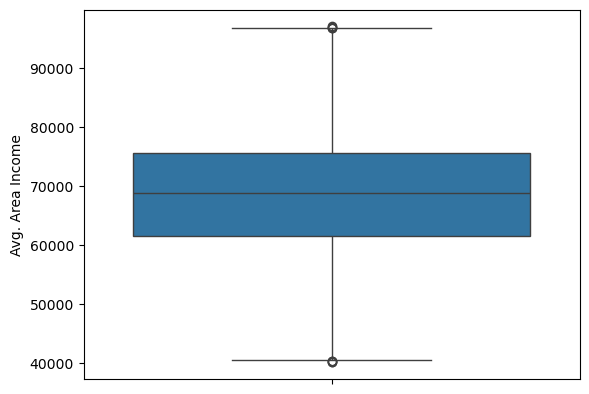

In [58]:
sns.boxplot(df["Avg. Area Income"])

<Axes: xlabel='Avg. Area Income', ylabel='Density'>

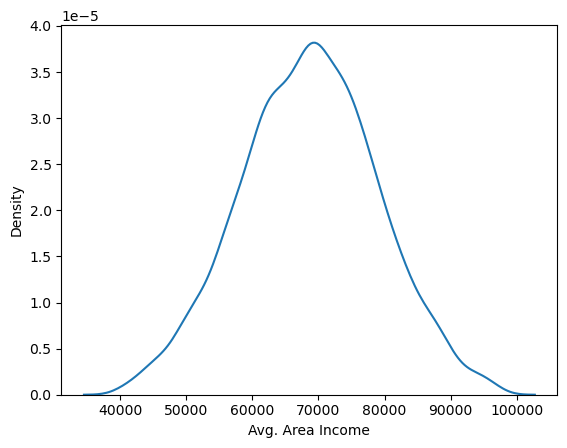

In [59]:
# Check skewness
sns.kdeplot(df["Avg. Area Income"]) # almost normally distributed

In [60]:
from scipy.stats import skew
skew(df["Avg. Area Income"]) # no skewness

np.float64(-0.0109320340892438)

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Count'>

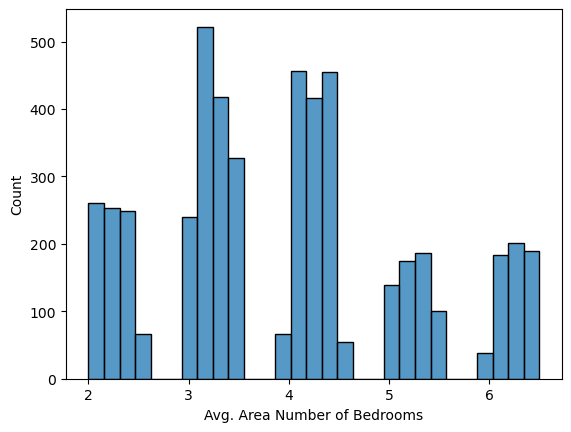

In [61]:
sns.histplot(df["Avg. Area Number of Bedrooms"])

In [62]:
skew(df["Avg. Area Number of Bedrooms"]) # little skewness

np.float64(0.37612751568905145)

In [63]:
#Handling categorical data

In [64]:
obje_col=df.select_dtypes("object").columns
obje_col

Index(['Address'], dtype='object')

In [65]:
print(df["Address"])
df.drop("Address",axis=1,inplace=True)

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object


In [66]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [67]:
nu_col=df.select_dtypes(["int","float"]).columns
nu_col

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

<Axes: >

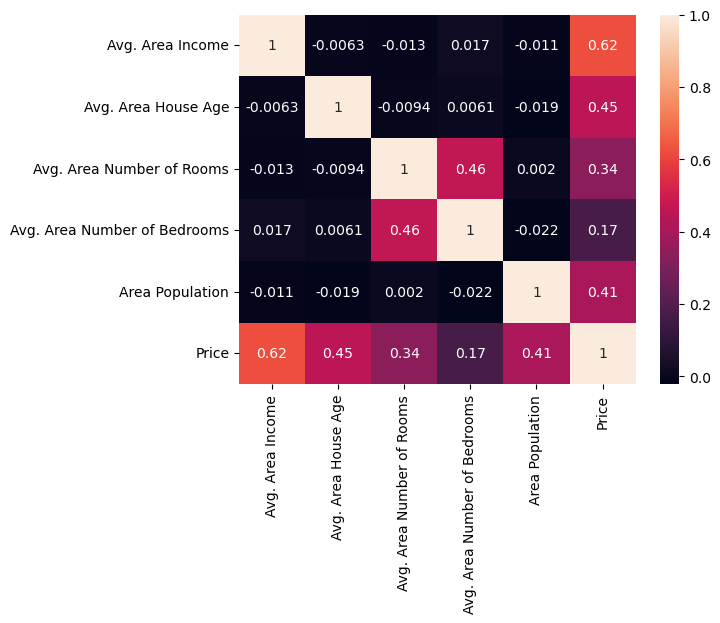

In [68]:
sns.heatmap(df[nu_col].corr(),annot=True)
# highest positively correlated feature-Avg. Area Income
# all the other columns are +vely correlated with the target
# least correlated -- Avg. Area number of bedrooms
# multicolinearity found between Avg. Area Number of Rooms, Avg. Area Number of Bedrooms

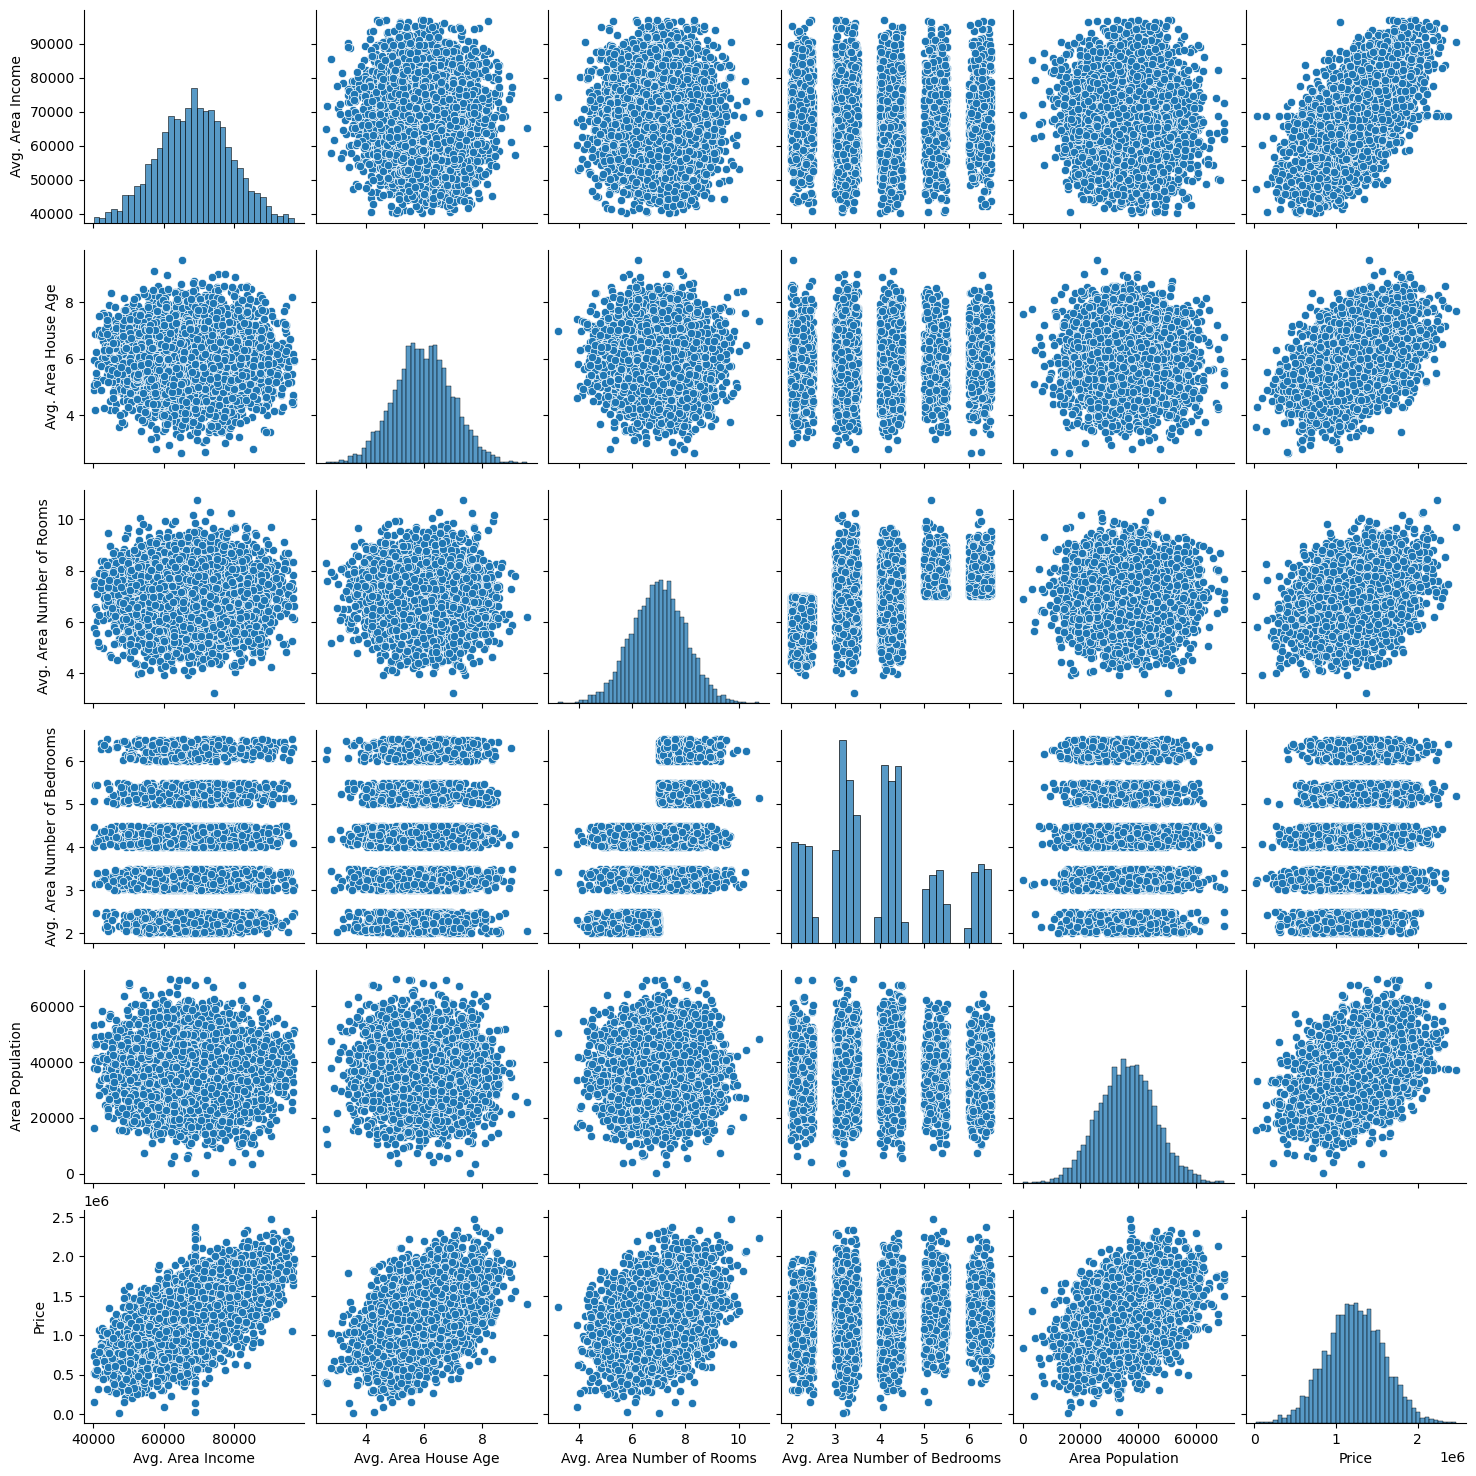

In [69]:
sns.pairplot(df)
# linearity exist

In [70]:
features=df.drop('Price',axis=1)
target=df['Price']

In [71]:
# Scaling-- 

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.056422,-0.296927,0.021274,0.088062,-1.317599
1,1.027719,0.025902,-0.255506,-0.722301,0.403999
2,-0.709220,-0.112303,1.516243,0.930840,0.072410
3,-0.510188,1.221572,-1.393077,-0.584540,-0.186734
4,-0.835405,-0.944834,0.846742,0.201513,-0.988387


In [73]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [74]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(4000, 5) (4000,)
(1000, 5) (1000,)


In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain) #
ypred=lr.predict(xtest)

In [76]:
f=pd.DataFrame({"Columns":xtrain.columns,
                "Coefficient":lr.coef_})
f

,Columns,Coefficient
0,Avg. Area Income,224114.992723
1,Avg. Area House Age,164900.312808
2,Avg. Area Number of Rooms,122125.998356
3,Avg. Area Number of Bedrooms,2368.432167
4,Area Population,149694.507592


In [77]:
lr.intercept_

np.float64(1233949.085133209)

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest, ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

MAE : 86176.38394963852
MSE : 13180616893.166945
RMSE : 114806.86779616865
R2 : 0.9019835739741402


<Axes: ylabel='Price'>

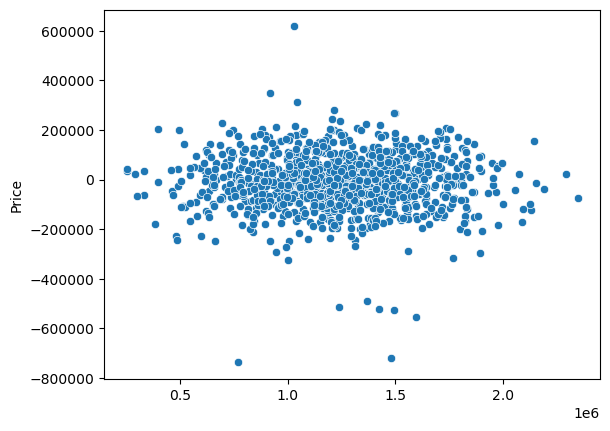

In [79]:
# homoscedascity
sns.scatterplot(x=ypred,y=(ytest-ypred)) # constant variance -- satisfied

<Axes: xlabel='Price', ylabel='Density'>

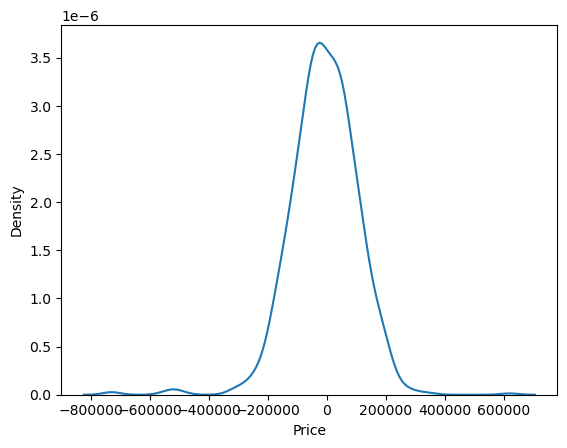

In [80]:
# Normality of residuals -- satisfied
sns.kdeplot(ytest-ypred)

In [84]:
def p(aai,aaha,aanr,aanbr,ap):
    x=[[aai,aaha,aanr,aanbr,ap]]
    x_s=scaler.transform(x)
    p=lr.predict(x_s)
    print("House price will be : ",p[0])
print("Give avg area income value between 40460 ,96829")
p(79545.458574,5.682861,7.009188,4.09,23086.800503)

Give avg area income value between 40460.826853417486 ,96829.09851173924
House price will be :  1227315.0998814786


In [82]:
xtrain.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')